<a href="https://colab.research.google.com/github/PolyanskayaP/FMMRAZ_6sem/blob/main/KDZ6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
def qqqq(x1, x2, kolvo, n):
    from random import uniform
    import numpy as np    
    x_ar = np.random.uniform(x1, x2, kolvo) #сгенерировали массив x
    f1_ar = x_ar
    f2_ar = x_ar
    Fx_ar = (f1_ar**2)/(4*(n**2)) + ((f2_ar - n)**2)/n**2

    return Fx_ar

In [17]:
#def gotov_f():
 #   f1 = [28.0, 33.0, 22.0, 23.0, 19.0, 21.0, 22.0, 20.0, 17.0, 15.0, 38.0, 42.0, 39.0, 35.0, 32.0, 36.0, 23.0, 46.0, 29.0, 23.0]
  #  f2 = [34.0, 30.0, 29.0, 31.0, 32.0, 37.0, 41.0, 38.0, 35.0, 33.0, 21.0, 17.0, 23.0, 36.0, 40.0, 17.0, 23.0, 23.0, 26.0, 46.0]
  #  return(f1, f2) 
def get_odz(f1):
    f2=[]
    yverh, yniz = 0, 0
    f1sq = 11.5*np.sqrt(2) + 23
    if (f1 >= 11.5) and (f1 <= 20.572):
        yverh=23+f1
        yniz=46-f1
    elif (f1 > 20.572) and (f1 <= 36.8):
        yverh=np.sqrt(529*(1-((f1**2)/(46**2)))) + 23
        #np.sqrt((23**2 - (f1-23)**2)) + 23
        yniz=46-f1
    elif (f1 > 36.8) and (f1 <= 46):
        yverh=np.sqrt(529*(1-((f1**2)/(46**2)))) + 23
        #np.sqrt((23**2 - (f1-23)**2)) + 23
        yniz= - np.sqrt(529*(1-((f1**2)/(46**2)))) + 23
        # - np.sqrt((23**2 - (f1-23)**2)) + 23
    f2.append(yniz)
    f2.append(yverh)
    return(f2)

def gener_f1_f2(nach, kon, kolvo):
    f1_ar = np.random.uniform(nach, kon, kolvo)  #сгенерировали массив иксов
    f2_ar = []
    for f1 in f1_ar:
        na, ko = get_odz(f1)
        f2 = uniform(na, ko)
        f2_ar.append(f2) 
    #dictionary = dict(zip(f1_ar, f2_ar)
    #print(f1_ar, f2_ar)
    return(f1_ar, f2_ar)

def pareto_mu(f1, f2, t1, t2):
    if (f1 == t1) and (f2 == t2):
        return 1
    elif (t1 <= f1) and (t2 <= f2):
        return -1
    else:
        return 0

def find_pareto(f1_ar, f2_ar, kolvo):
    tabl = []
    for f1, f2 in zip(f1_ar, f2_ar):
        inc = 0
        el = [0 for i in range(kolvo)]
        tabl.append(el)
        for t1, t2 in zip(f1_ar, f2_ar):
            if (len(tabl)==1):
                tabl[len(tabl)-1][inc] = pareto_mu(f1, f2, t1, t2) 
            elif (tabl[-2][inc] != -1):
                tabl[len(tabl)-1][inc] = pareto_mu(f1, f2, t1, t2) 
            elif (tabl[-2][inc] == -1):
                tabl[len(tabl)-1][inc] = -1
            inc = inc + 1
    Tabl = np.array(tabl)
    inc = 0
    pare1 = []
    pare2 = []
    not_pare1 = []
    not_pare2 = []
    for q in Tabl[-1]:
        if (q==-1):
            not_pare1.append(f1_ar[inc])
            not_pare2.append(f2_ar[inc])
        else:
            pare1.append(f1_ar[inc])
            pare2.append(f2_ar[inc])
        inc = inc + 1
    return(pare1, pare2, not_pare1, not_pare2)

def find_1z(pare1, pare2, M1, M2):
    sp1 = list()
    sp2 = list()
    for m1,m2 in zip(M1,M2):
        max1 = pare1[0]
        max2 = pare2[0]  
        fmax = m1*pare1[0] + m2*pare2[0]
        for p1, p2 in zip(pare1, pare2):
            lmax = m1*p1 + m2*p2 
            if lmax > fmax:
                fmax = lmax
                max1 = p1
                max2 = p2
        for p1, p2 in zip(pare1, pare2):
            if (p1==max1) and (p2==max2):
                pare1.remove(p1)
                pare2.remove(p2)  
        sp1.append(max1)
        sp2.append(max2)
    return sp1, sp2, pare1, pare2

def find_2z(pare1, pare2):
    import math
    min1=pare1[0]
    min2=pare2[0]
    d=abs(min1-min2)/math.sqrt(2)
    for p1, p2 in zip(pare1,pare2):
        pr = abs(p1-p2)/math.sqrt(2)
        if pr<d:
            d=pr
            min1=p1
            min2=p2
    pare1.remove(min1)
    pare2.remove(min2) 
    return min1, min2, pare1, pare2

def find_3z(pare1, pare2, u1, u2):
    p1 = pare1.copy()
    pp1 = pare1.copy()
    p2 = pare2.copy()
    pp2 = pare2.copy()
    for f1,f2 in zip(pare1, pare2):
        if f2<u2: #ogr u2
            p1.remove(f1)
            p2.remove(f2)
        if f1<u1:  #ogr u1
            pp1.remove(f1)
            pp2.remove(f2)
    maxf2 = max(pp2)
    maxf1 = max(p1)
    i2 = pp2.index(maxf2)
    i1 = p1.index(maxf1) 
    sp1 = [pp1[i2],pp2[i2]]  #ogr u1
    sp2 = [p1[i1],p2[i1]]  #ogr u2
    pare1.remove(sp1[0])
    pare1.remove(sp2[0])
    pare2.remove(sp1[1])
    pare2.remove(sp2[1])
    return sp1, sp2, pare1, pare2

def find_4z(pare1, pare2):
    it_x = max(pare1)
    it_y = max(pare2) 
    rasst = ((it_x-pare1[0])**2 + (it_y-pare2[0])**2)
    rx=pare1[0]
    ry=pare2[0] 
    for f1,f2 in zip(pare1,pare2):
        if ((it_x-f1)**2 + (it_y-f2)**2) < rasst:
            rasst = ((it_x-f1)**2 + (it_y-f2)**2)
            rx = f1
            ry = f2
    for f1, f2 in zip(pare1, pare2):
            if (f1==rx) and (f2==ry):
                pare1.remove(f1)
                pare2.remove(f2)  
    return rx,ry,pare1,pare2 ,it_x,it_y

def draw(PARE1, PARE2, NOT_PARE1, NOT_PARE2):
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=((20,15)))
    ax = fig.add_subplot(111) 

    f1a = np.linspace(0, 50, 100)
    f2a = n + f1a

    f1b = np.linspace(0, 50, 100)
    f2b = 2*n - f1b 

    ax.scatter(PARE1, PARE2, color = '#19ff19', marker = '*')  #точки
    #ax.scatter(NOT_PARE1, NOT_PARE2, color = '#FC0FC0', marker = '*')  #точки

    ax.set_aspect(1)  #чтобы ровненько было, не вытянуто 

    from matplotlib.patches import Ellipse
    import matplotlib as mpl
    %matplotlib inline

    mean = [ 0 ,  23 ]
    width = 92
    height = 46
    angle = 0
    ell = mpl.patches.Ellipse(xy=mean, width=width, height=height, angle = 180+angle, fill=False, color='blue')
    ax.add_artist(ell)

    #cc = plt.Circle(( 23 , 23 ), 23, color='k', fill=False ) 
    #ax.add_artist( cc ) 

    plt.xlim(-1.25,1.25)  #координатная сетка от скольки до скольки 
    plt.ylim(-1.25,1.25)

    plt.grid(linestyle='--')  #стиль сеточки 

    plt.xticks([i for i in range(50)], size=8)
    plt.yticks([i for i in range(50)], size=8)

    K = plt.figure() 
    K.set_figwidth(5) 
    K.set_figheight(2) 

    ax.set_xlim([0, 50])
    ax.set_ylim([0, 50])
    ax.set_title('Точки Парето', color = 'black', size = 12)
    ax.set_xlabel('ось абcцисc (f1)')
    ax.set_ylabel('ось ординат (f2)')

    ax.plot(f1a, f2a, color = 'red')
    ax.plot(f1b, f2b, color = 'green')

    plt.show()

def draw_1z(PARE1, PARE2, NOT_PARE1, NOT_PARE2, M1, M2):
    import matplotlib.pyplot as plt
    sp1, sp2, PARE1, PARE2 = find_1z(PARE1, PARE2, M1, M2)
    fig = plt.figure(figsize=((20,15)))
    ax = fig.add_subplot(111) 

    f1a = np.linspace(0, 50, 100)
    f2a = n + f1a

    f1b = np.linspace(0, 50, 100)
    f2b = 2*n - f1b 

    forlab0="m1="+str(M1[0])+" m2="+str(M2[0])
    forlab1="m1="+str(M1[1])+" m2="+str(M2[1])
    forlab2="m1="+str(M1[2])+" m2="+str(M2[2])
    ax.scatter(PARE1, PARE2, color = '#19ff19', marker = '*')  #точки
    ax.scatter(sp1[0], sp2[0], color = '#FF1493', marker = '*', label=forlab0)  #точки
    ax.scatter(sp1[1], sp2[1], color = '#800080', marker = '*', label=forlab1)  #точки
    ax.scatter(sp1[2], sp2[2], color = '#0000FF', marker = '*', label=forlab2)  #точки


    ax.set_aspect(1)  #чтобы ровненько было, не вытянуто 

    from matplotlib.patches import Ellipse
    import matplotlib as mpl
    %matplotlib inline

    mean = [ 0 ,  23 ]
    width = 92
    height = 46
    angle = 0
    ell = mpl.patches.Ellipse(xy=mean, width=width, height=height, angle = 180+angle, fill=False, color='blue')
    ax.add_artist(ell)

    plt.xlim(-1.25,1.25)  #координатная сетка от скольки до скольки 
    plt.ylim(-1.25,1.25)

    plt.grid(linestyle='--')  #стиль сеточки 

    plt.xticks([i for i in range(50)], size=8)
    plt.yticks([i for i in range(50)], size=8)

    K = plt.figure() 
    K.set_figwidth(5) 
    K.set_figheight(2) 

    ax.set_xlim([0, 50])
    ax.set_ylim([0, 50])
    ax.set_title('Задание 1', color = 'black', size = 12)
    ax.set_xlabel('ось абcцисc (f1)')
    ax.set_ylabel('ось ординат (f2)')

    ax.plot(f1a, f2a, color = 'red')
    ax.plot(f1b, f2b, color = 'green')
    ax.legend()
    plt.show()

def draw_2z(PARE1, PARE2):
    import matplotlib.pyplot as plt

    rx,ry,PARE1,PARE2 = find_2z(PARE1, PARE2)

    fig = plt.figure(figsize=((20,15)))
    ax = fig.add_subplot(111) 

    f1a = np.linspace(0, 50, 100)
    f2a = n + f1a

    f1b = np.linspace(0, 50, 100)
    f2b = 2*n - f1b 

    ax.plot([i for i in range(46)], [i for i in range(46)], color = 'black')  #линия
    ax.scatter(PARE1, PARE2, color = '#19ff19', marker = '*')  #точки
    ax.scatter(rx, ry, color = '#FC0FC0', marker = '*', label="точка (функ.Гермейера)")  #точки

    ax.set_aspect(1)  #чтобы ровненько было, не вытянуто 

    from matplotlib.patches import Ellipse
    import matplotlib as mpl
    %matplotlib inline

    mean = [ 0 ,  23 ]
    width = 92
    height = 46
    angle = 0
    ell = mpl.patches.Ellipse(xy=mean, width=width, height=height, angle = 180+angle, fill=False, color='blue')
    ax.add_artist(ell)

    #cc = plt.Circle(( 23 , 23 ), 23, color='k', fill=False ) 
    #ax.add_artist( cc ) 

    plt.xlim(-1.25,1.25)  #координатная сетка от скольки до скольки 
    plt.ylim(-1.25,1.25)

    plt.grid(linestyle='--')  #стиль сеточки 

    plt.xticks([i for i in range(50)], size=8)
    plt.yticks([i for i in range(50)], size=8)

    K = plt.figure() 
    K.set_figwidth(5) 
    K.set_figheight(2) 

    ax.set_xlim([0, 50])
    ax.set_ylim([0, 50])
    ax.set_title('4 задание', color = 'black', size = 12)
    ax.set_xlabel('ось абcцисc (f1)')
    ax.set_ylabel('ось ординат (f2)')

    ax.plot(f1a, f2a, color = 'red')
    ax.plot(f1b, f2b, color = 'green')
    ax.legend()
    plt.show()

def draw_3z(PARE1, PARE2, u1, u2):
    import matplotlib.pyplot as plt
    sp1, sp2, PARE1, PARE2 = find_3z(PARE1, PARE2, u1, u2)

    fig = plt.figure(figsize=((20,15)))
    ax = fig.add_subplot(111) 

    f1a = np.linspace(0, 50, 100)
    f2a = n + f1a

    f1b = np.linspace(0, 50, 100)
    f2b = 2*n - f1b 
    ax.plot([i for i in range(46)], [41.4 for i in range(46)], color = 'black')  #линия
    ax.plot([32.2 for i in range(50)], [i for i in range(50)], color = 'black')  #линия
    ax.scatter(PARE1, PARE2, color = '#19ff19', marker = '*')  #точки
    ax.scatter(sp1[0], sp1[1], color = 'red', marker = '*', label="огр. u1=32.2")  #точки
    ax.scatter(sp2[0], sp2[1], color = 'blue', marker = '*', label="огр. u2=41.4")  #точки

    ax.set_aspect(1)  #чтобы ровненько было, не вытянуто 

    from matplotlib.patches import Ellipse
    import matplotlib as mpl
    %matplotlib inline

    mean = [ 0 ,  23 ]
    width = 92
    height = 46
    angle = 0
    ell = mpl.patches.Ellipse(xy=mean, width=width, height=height, angle = 180+angle, fill=False, color='blue')
    ax.add_artist(ell)

    #cc = plt.Circle(( 23 , 23 ), 23, color='k', fill=False ) 
    #ax.add_artist( cc ) 

    plt.xlim(-1.25,1.25)  #координатная сетка от скольки до скольки 
    plt.ylim(-1.25,1.25)

    plt.grid(linestyle='--')  #стиль сеточки 

    plt.xticks([i for i in range(50)], size=8)
    plt.yticks([i for i in range(50)], size=8)

    K = plt.figure() 
    K.set_figwidth(5) 
    K.set_figheight(2) 

    ax.set_xlim([0, 50])
    ax.set_ylim([0, 50])
    ax.set_title('3 задание', color = 'black', size = 12)
    ax.set_xlabel('ось абcцисc (f1)')
    ax.set_ylabel('ось ординат (f2)')

    ax.plot(f1a, f2a, color = 'red')
    ax.plot(f1b, f2b, color = 'green')
    ax.legend()
    plt.show()

def draw_4z(PARE1, PARE2):
    import matplotlib.pyplot as plt

    rx,ry,PARE1,PARE2 ,it_x,it_y= find_4z(PARE1, PARE2)

    fig = plt.figure(figsize=((20,15)))
    ax = fig.add_subplot(111) 

    f1a = np.linspace(0, 50, 100)
    f2a = n + f1a

    f1b = np.linspace(0, 50, 100)
    f2b = 2*n - f1b 
    
    ax.scatter(it_x, it_y, color = 'black', marker = '*', label="Идеальная точка")  #точки
    ax.scatter(PARE1, PARE2, color = '#19ff19', marker = '*')  #точки
    ax.scatter(rx, ry, color = '#FC0FC0', marker = '*', label="Точка, приближенная к идеальной")  #точки

    ax.set_aspect(1)  #чтобы ровненько было, не вытянуто 

    from matplotlib.patches import Ellipse
    import matplotlib as mpl
    %matplotlib inline

    mean = [ 0 ,  23 ]
    width = 92
    height = 46
    angle = 0
    ell = mpl.patches.Ellipse(xy=mean, width=width, height=height, angle = 180+angle, fill=False, color='blue')
    ax.add_artist(ell)

    #cc = plt.Circle(( 23 , 23 ), 23, color='k', fill=False ) 
    #ax.add_artist( cc ) 

    plt.xlim(-1.25,1.25)  #координатная сетка от скольки до скольки 
    plt.ylim(-1.25,1.25)

    plt.grid(linestyle='--')  #стиль сеточки 

    plt.xticks([i for i in range(50)], size=8)
    plt.yticks([i for i in range(50)], size=8)

    K = plt.figure() 
    K.set_figwidth(5) 
    K.set_figheight(2) 

    ax.set_xlim([0, 50])
    ax.set_ylim([0, 50])
    ax.set_title('4 задание', color = 'black', size = 12)
    ax.set_xlabel('ось абcцисc (f1)')
    ax.set_ylabel('ось ординат (f2)')

    ax.plot(f1a, f2a, color = 'red')
    ax.plot(f1b, f2b, color = 'green')
    ax.legend()
    plt.show()



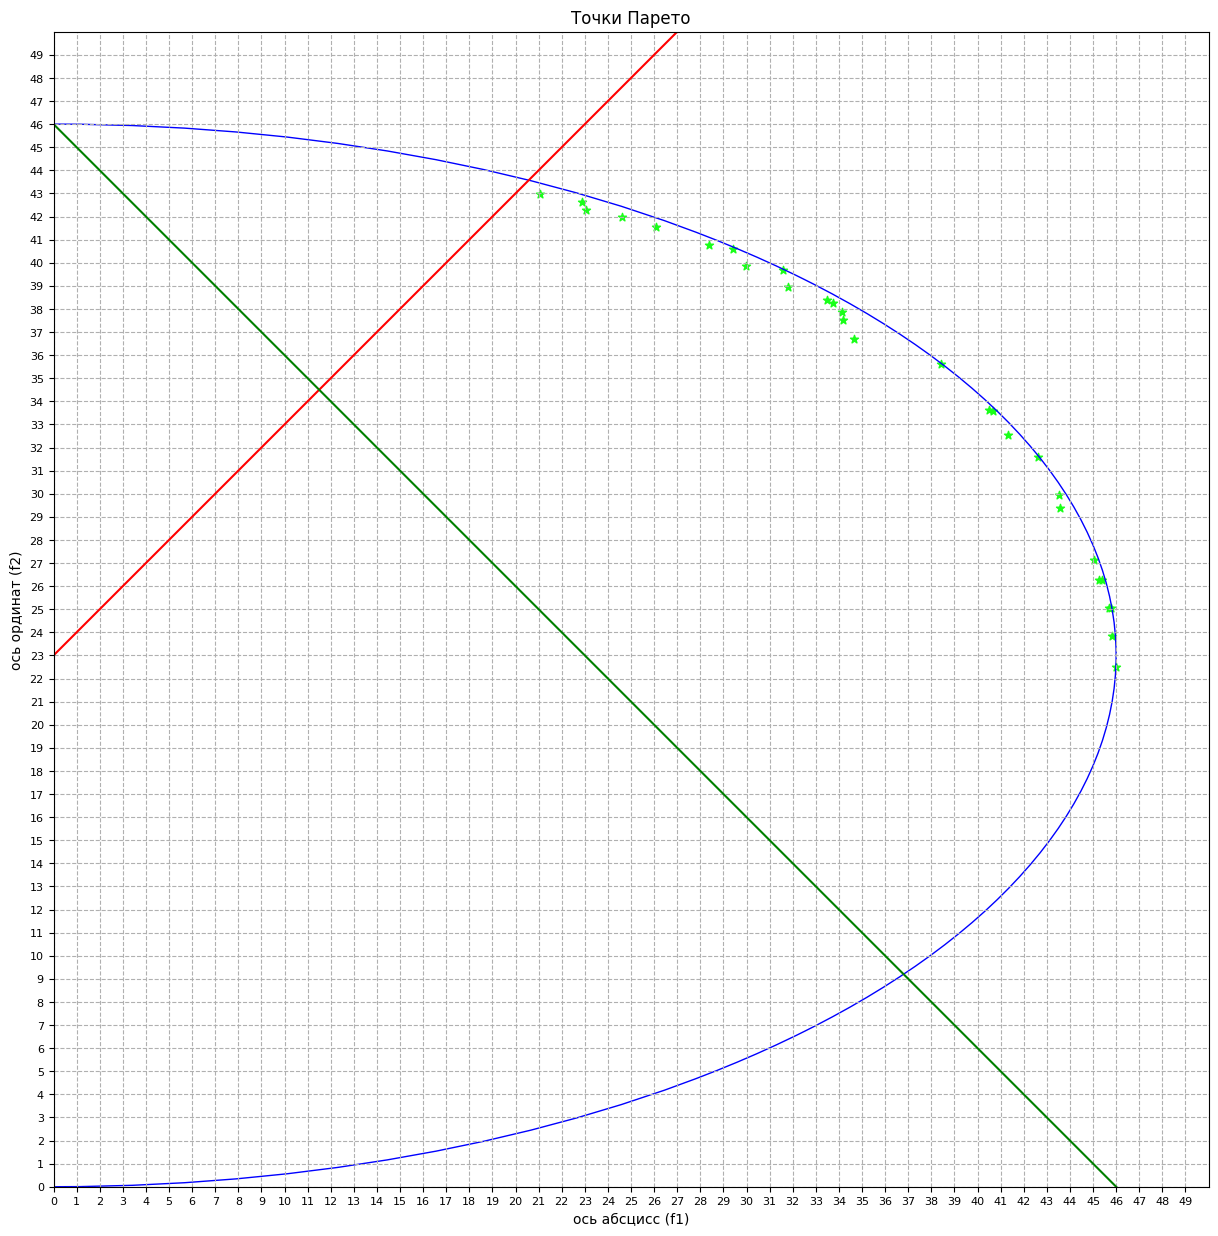

<Figure size 500x200 with 0 Axes>

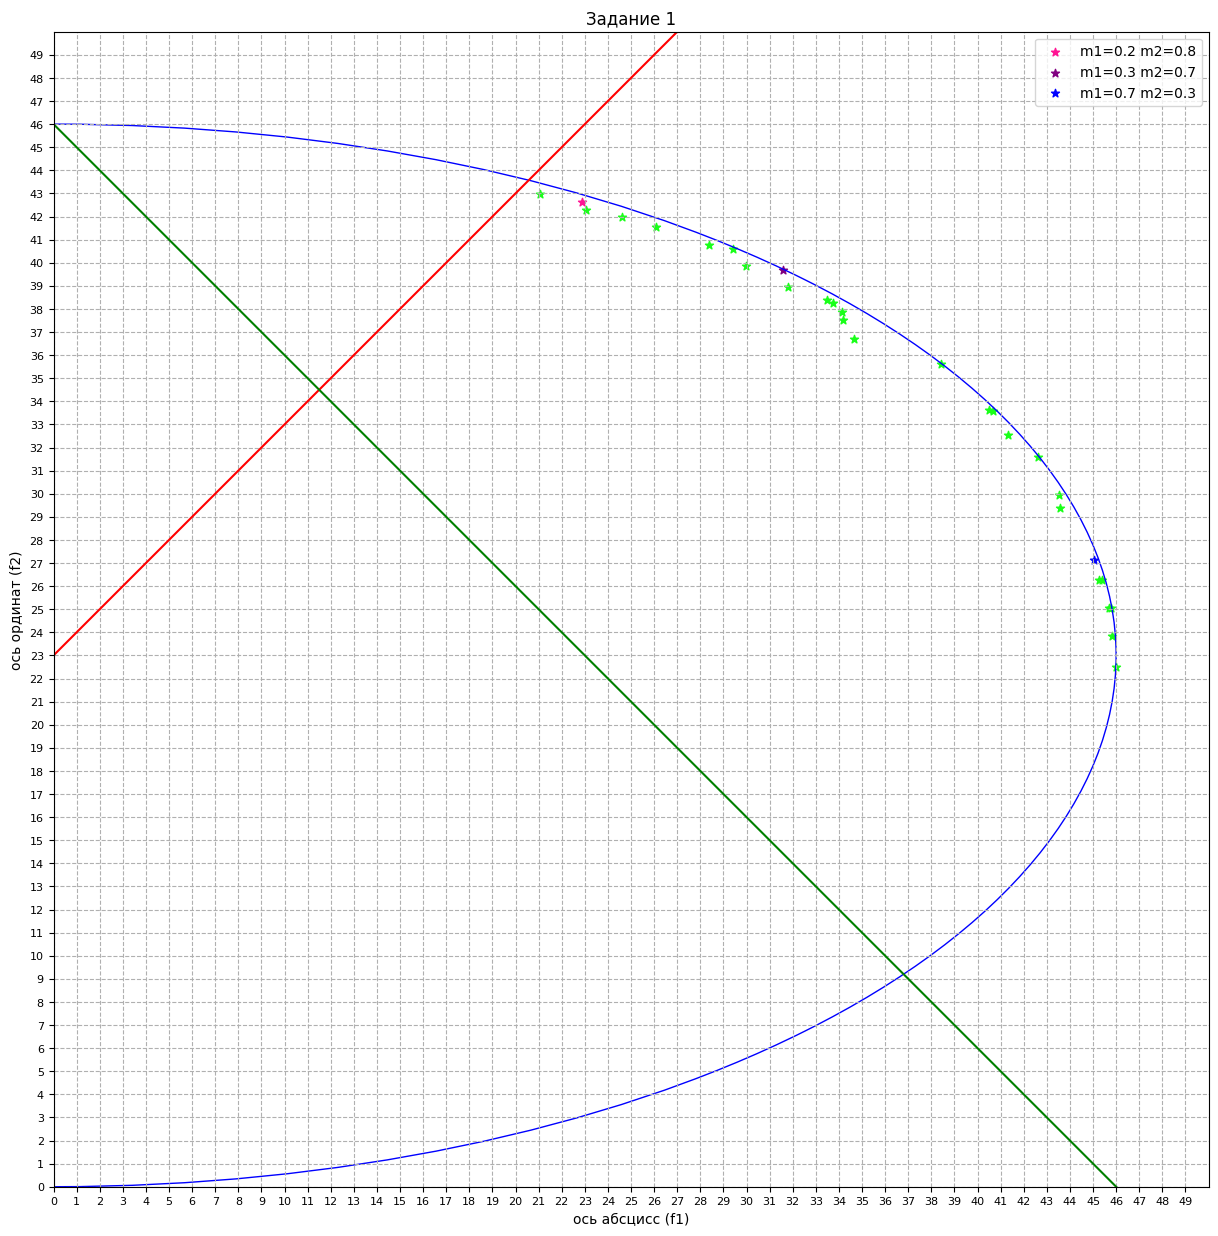

<Figure size 500x200 with 0 Axes>

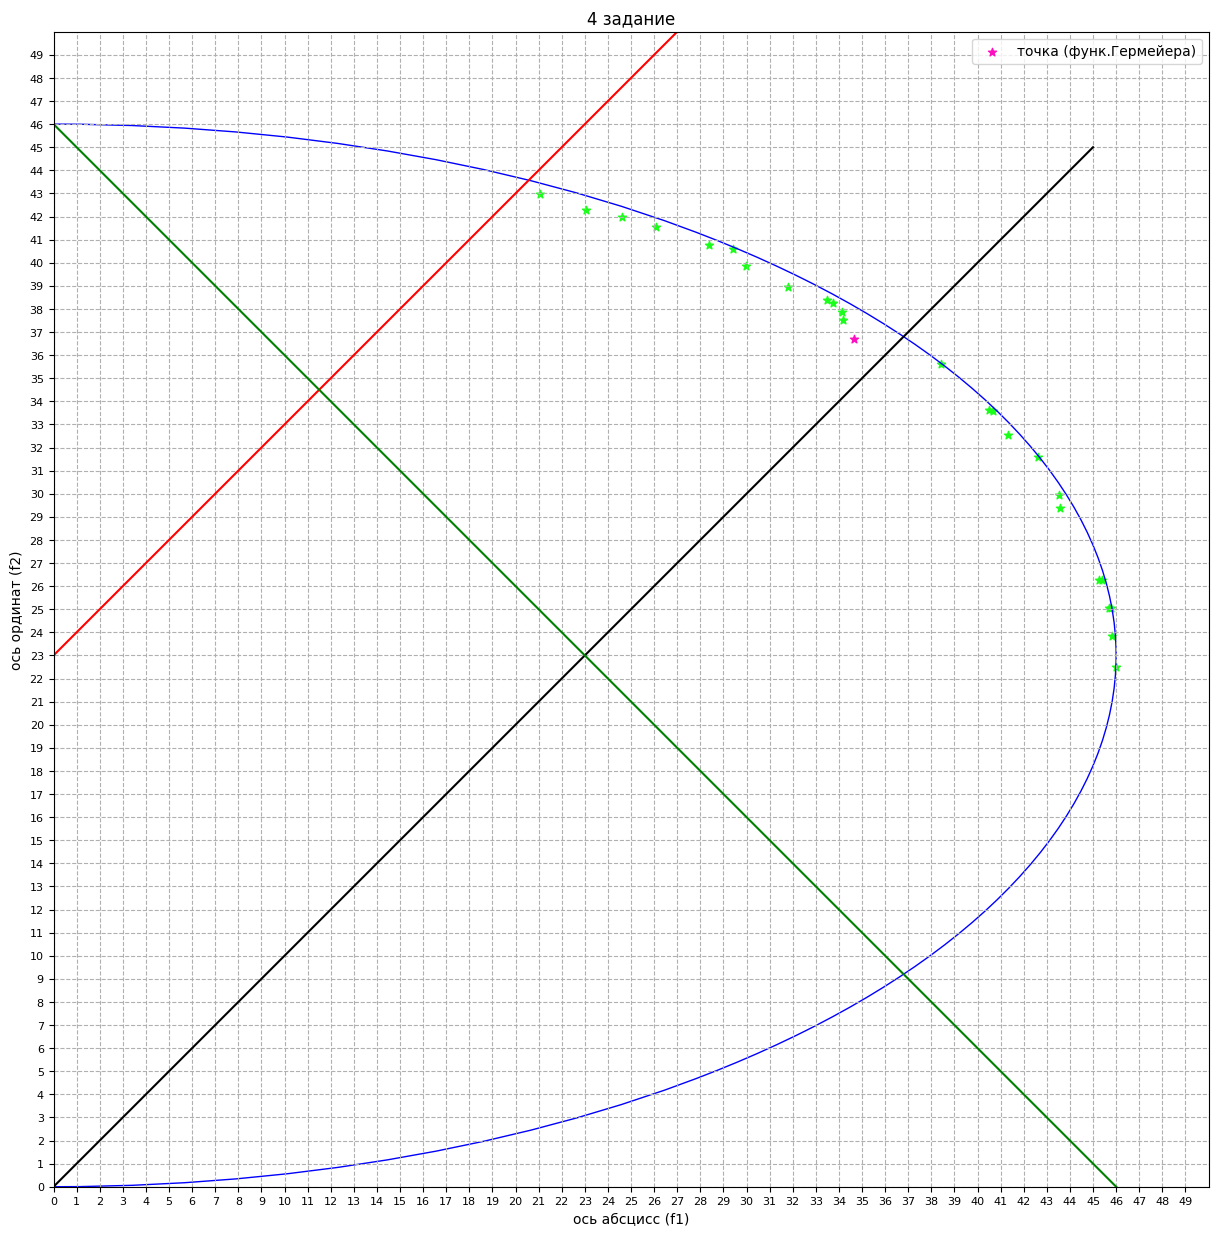

<Figure size 500x200 with 0 Axes>

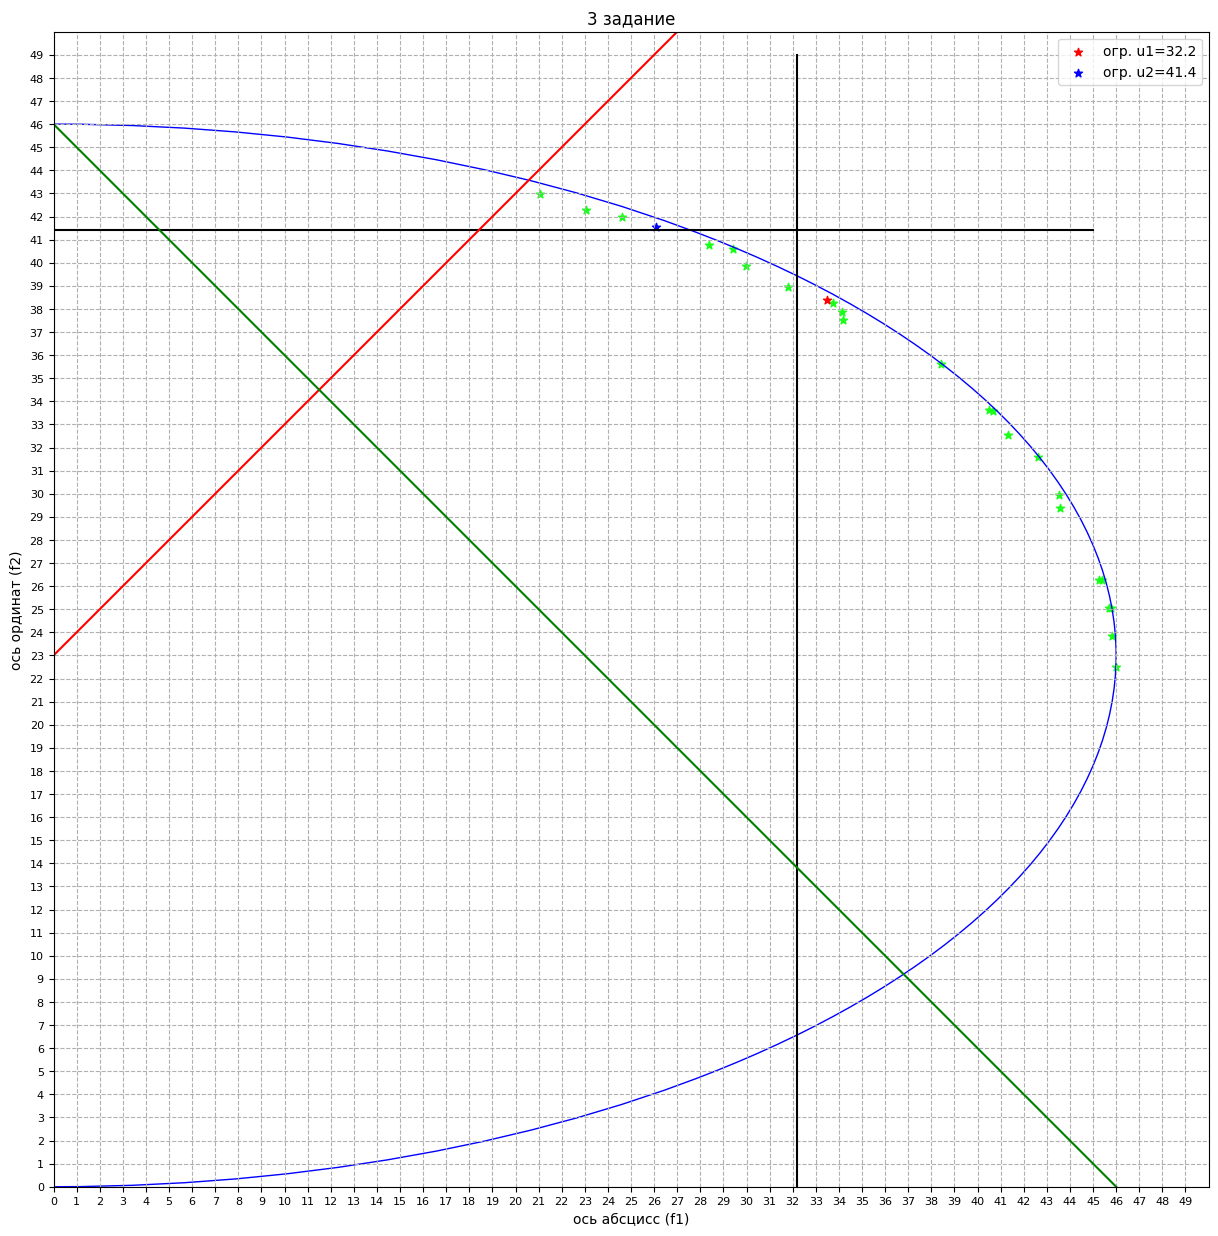

<Figure size 500x200 with 0 Axes>

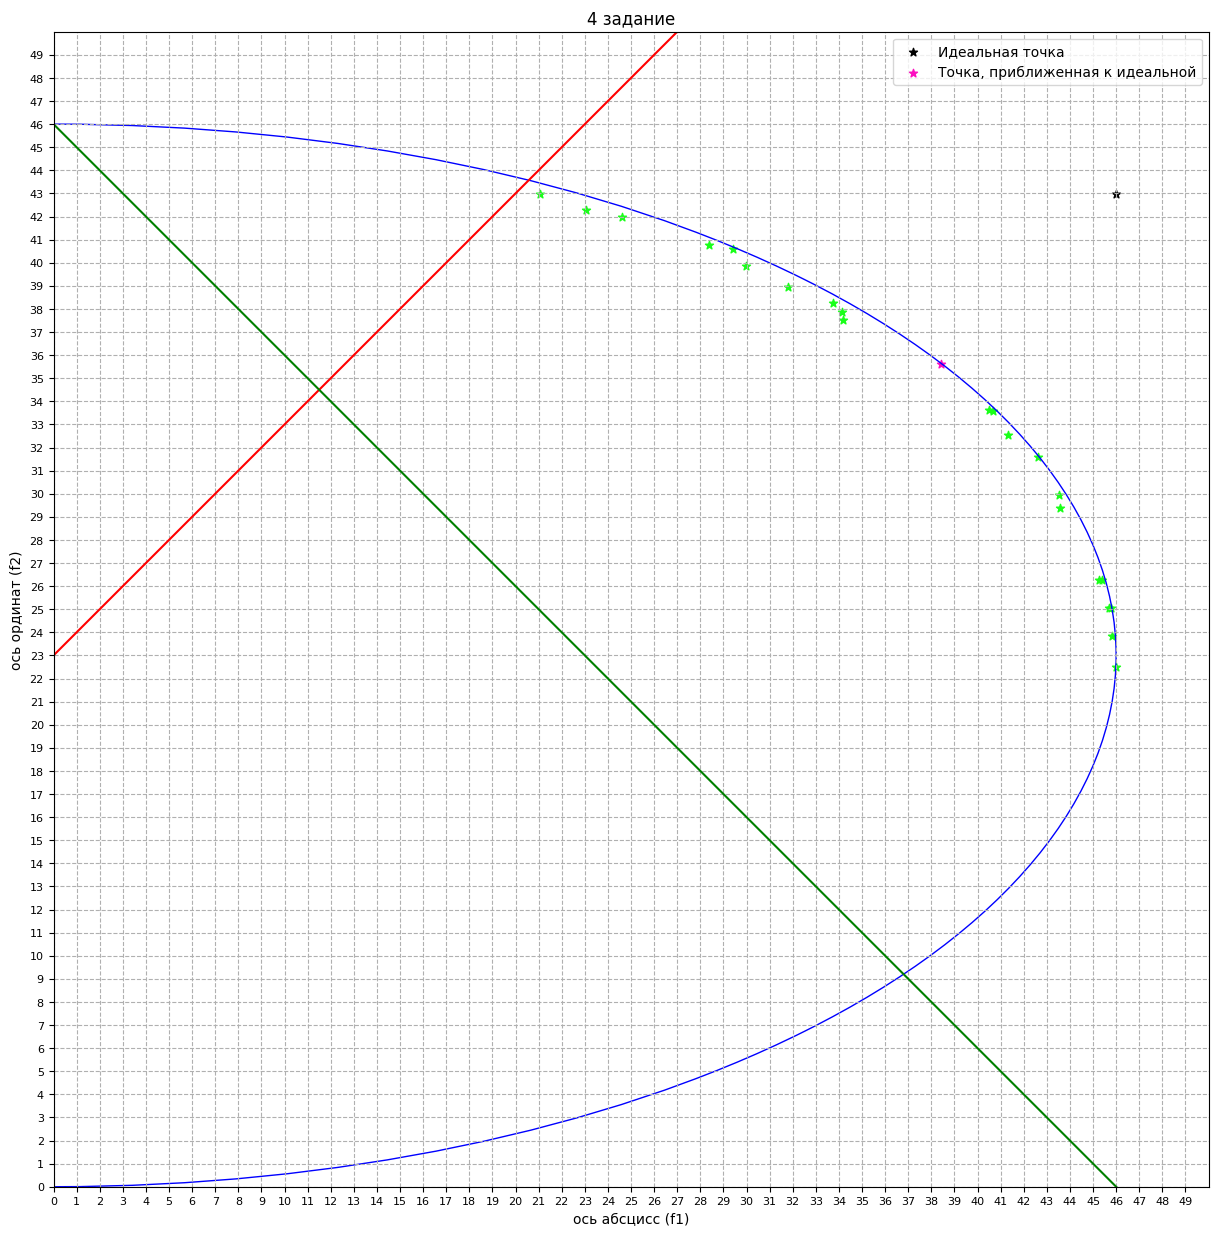

<Figure size 500x200 with 0 Axes>

In [18]:
from numpy.lib.nanfunctions import nancumsum
from random import uniform
import numpy as np

n=23 #не всегда
NACH=11.5
KON=46
M1 = [0.2, 0.3, 0.7]
M2 = [0.8, 0.7, 0.3]
u1 = 32.2
u2 = 41.4

KOLVO=1000

F1, F2 = gener_f1_f2(NACH, KON, KOLVO)
PARE1, PARE2, NOT_PARE1, NOT_PARE2 = find_pareto(F1, F2, KOLVO)
draw(PARE1, PARE2, NOT_PARE1, NOT_PARE2)
draw_1z(PARE1, PARE2, NOT_PARE1, NOT_PARE2, M1, M2)
draw_2z(PARE1, PARE2)
draw_3z(PARE1, PARE2, u1, u2)
draw_4z(PARE1, PARE2)